### Problema 1 - Word Cloud

In [11]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# !pip install wordcloud
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('omw-1.4')

In [12]:
dataset = pd.read_csv('tw_source.csv', encoding='latin_1', header=None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']

#### Menciones más populares

In [13]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in dataset['tweet']:
    ats_in_tweet = [palabra for palabra in tweet.split(' ') if '@' in palabra]
    lista_menciones.extend(ats_in_tweet)
    
    try:
        ultimo_at = ats_in_tweet[len(ats_in_tweet) - 1]
        filas_per_at.setdefault(ultimo_at, []).append(cont)
    except:
        pass
    finally:
        cont = cont + 1

#### Conteo de las menciones y obtención de los 3 usuarios más populares

In [14]:
contador_menciones = Counter(lista_menciones)
usuarios_mas_mencionados = contador_menciones.most_common(4)[1:]
print(f"Usuarios más mencionados: {usuarios_mas_mencionados}")

Usuarios más mencionados: [('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]


#### Corpus para los 3 usuarios más populares

In [15]:
usuarios = ['@mileycyrus', '@tommcfly', '@ddlovato']
corpus_usuarios = {}

for usuario in usuarios:
    filas_usuario = filas_per_at[usuario]
    corpus = dataset.iloc[filas_usuario, [1, 2, 5]].copy()
    corpus['length'] = corpus['tweet'].apply(len)
    corpus_usuarios[usuario] = corpus

#### Muestra de los corpus creados

In [16]:
for usuario in usuarios:
    print(f"\nCorpus para {usuario}:")
    print(corpus_usuarios[usuario].head())


Corpus para @mileycyrus:
              id                         fecha  \
1021  1468063101  Mon Apr 06 23:30:57 PDT 2009   
2014  1468286517  Tue Apr 07 00:45:20 PDT 2009   
2073  1468297110  Tue Apr 07 00:49:07 PDT 2009   
2080  1468298918  Tue Apr 07 00:49:44 PDT 2009   
2156  1468318249  Tue Apr 07 00:56:41 PDT 2009   

                                                  tweet  length  
1021  @mileycyrus hahaha dont be like that one time ...     107  
2014  @mileycyrus i have the same problem, but it's ...     137  
2073  @mileycyrus I guess counting sheep didn't work...      72  
2080  @mileycyrus I would too if it meant spending a...     100  
2156  @mileycyrus AWWW u seriously have the cutest d...     112  

Corpus para @tommcfly:
              id                         fecha  \
1789  1468233211  Tue Apr 07 00:26:52 PDT 2009   
2514  1468391638  Tue Apr 07 01:23:07 PDT 2009   
3029  1468502040  Tue Apr 07 02:03:41 PDT 2009   
3524  1468618787  Tue Apr 07 02:46:02 PDT 2009   
378

#### Remover stopwords y realizar stemming o lemmatización

In [17]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def procesar_texto(texto):
    palabras = word_tokenize(texto.lower())
    palabras_filtradas = [ps.stem(palabra) for palabra in palabras if palabra.isalnum() and palabra not in stop_words]
    return ' '.join(palabras_filtradas)

#### Aplicación de procesamiento de texto para los tres usuarios

In [18]:
for usuario, corpus in corpus_usuarios.items():
    corpus['tweet_procesado'] = corpus['tweet'].apply(procesar_texto)

#### WordCloud para cada usuario

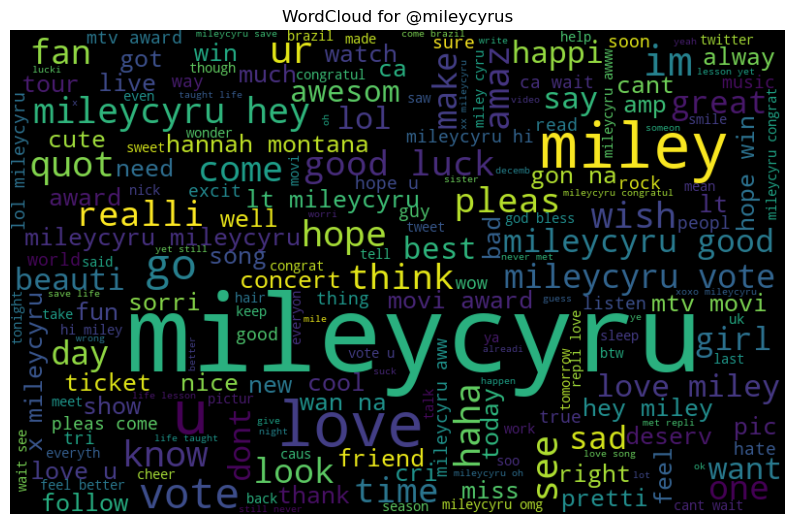

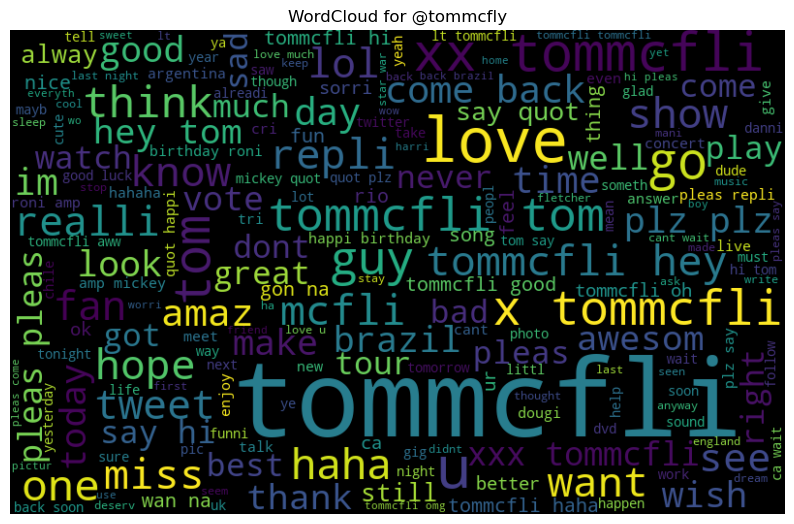

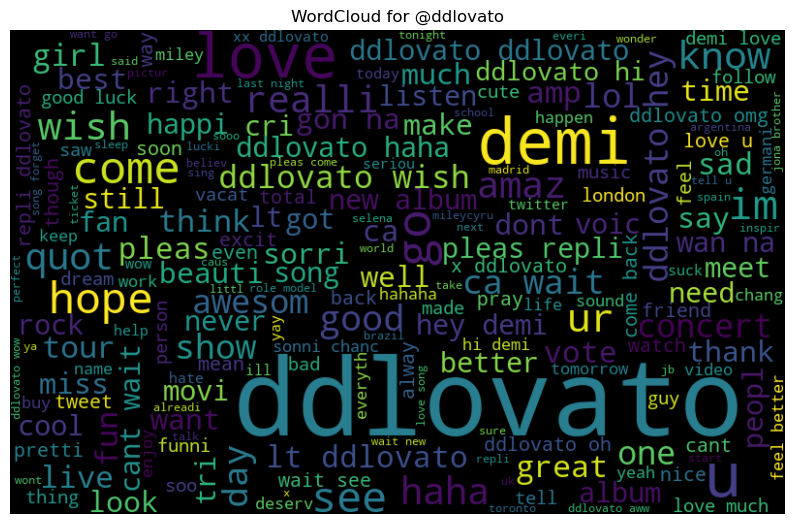

In [19]:
for usuario, corpus in corpus_usuarios.items():
    all_words = ' '.join([tweet for tweet in corpus['tweet_procesado']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {usuario}')
    plt.show()

#### WordCloud con el Top 10 de palabras más frecuentes

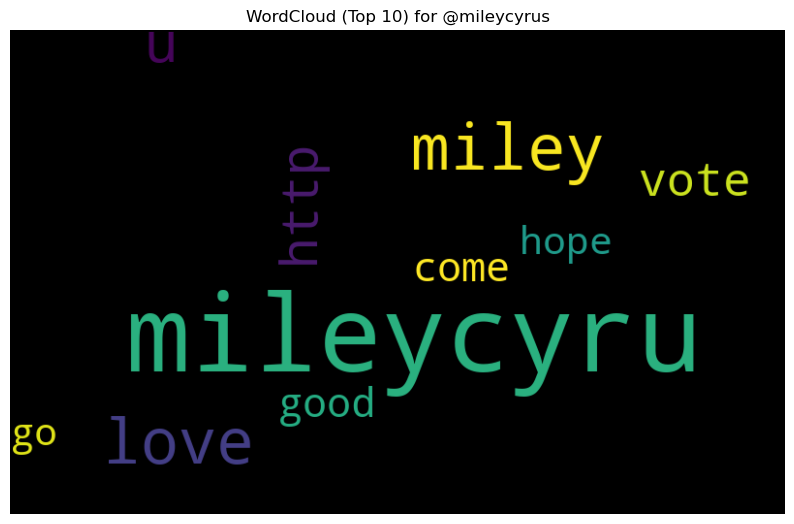

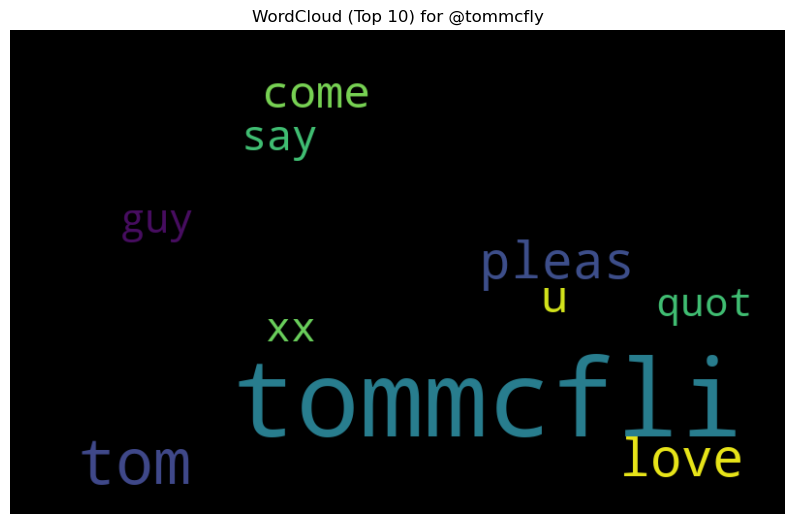

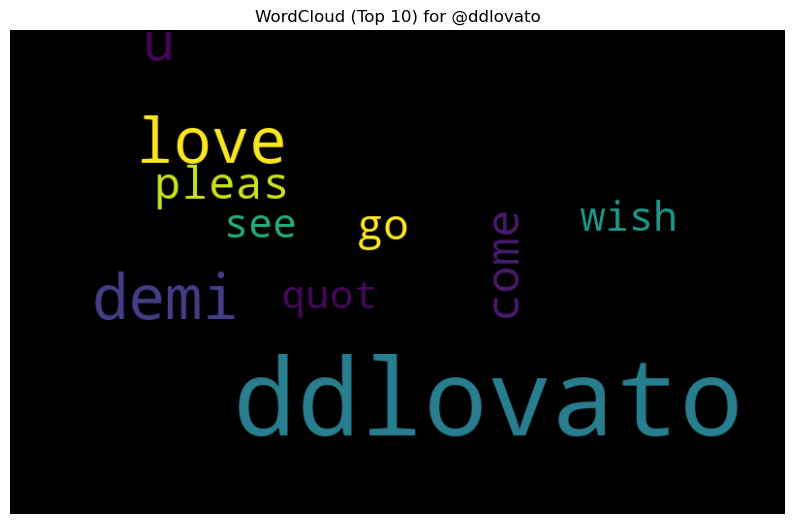

In [20]:
for usuario, corpus in corpus_usuarios.items():
    all_words = ' '.join([tweet for tweet in corpus['tweet_procesado']])
    word_freq = Counter(all_words.split())
    
    top_10_words = dict(word_freq.most_common(10))
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(top_10_words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud (Top 10) for {usuario}')
    plt.show()
